In [1]:
freq_file = "output/title_freq.txt"

In [2]:
import re
def data_clean(text):
    REGEX = re.compile("[^ ^a-zA-Z]")

    # remove non-alphabetical characters
    text = re.sub(REGEX, '', text)
    # remove extra spaces
    text = text.strip()
    return text

In [3]:
all_titles = []
with open(freq_file, 'r') as f:
    for line in f:
        title, count = line.strip().split('_')
        title = data_clean(title)
        all_titles.append(title.strip())

In [4]:
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(all_titles))
weight = tfidf.toarray()

In [5]:
import pandas as pd
df = pd.DataFrame(weight)
print(df.head())

   0    1    2    3    4    5    6    7    8    9    ...  231  232  233  234  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   235  236  237  238  239  240  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 241 columns]


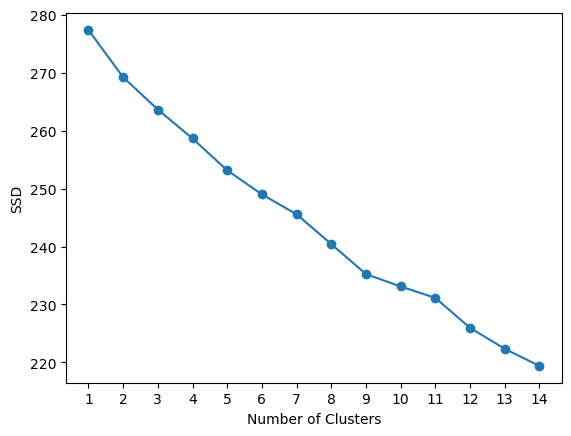

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

max_cluster_num = 15
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
ssd = []
for k in range(1, max_cluster_num):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, max_cluster_num), ssd, marker="o")
plt.xticks(range(1, max_cluster_num))
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.show()

In [7]:
kmeans = KMeans(init="random", n_clusters=9, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df)

#view cluster assignments for each observation
kmeans.labels_
df.insert(0, "Title", all_titles)
df.insert(1, "Label", kmeans.labels_)

In [8]:
df_titles = df.iloc[0:,0:2]

In [9]:
# applying groupby() function to
# group the data on team value.
gk = df_titles.groupby('Label')

In [10]:
work_experience = gk.get_group(0)
work_experience

In [11]:
gk.get_group(1)

,Title,Label
8,Professional Summary,1
9,Professional Experience,1
14,Professional Affiliations,1
25,Professional Profile,1
43,Professional Overview,1
49,Professional Background,1
51,Professional Development,1
63,Relevant Professional Experience,1
67,Professional Highlights,1
72,Professional Value Offered,1


In [12]:
community_service = gk.get_group(2)
community_service

In [13]:
gk.get_group(3)

,Title,Label
6,Education and Training,3
24,Activities and Honors,3
44,Awards,3
55,ExtraCurricular Activities,3
56,Education and Coursework,3
70,Volunteer Activities,3
75,Activities,3
82,Awards and Recognition,3
84,Fellowships and Awards,3
100,Membership Trainings and Certificates,3


In [14]:
gk.get_group(4)

,Title,Label
37,Objective,4
53,OBJECTIVE,4
165,Background Objective,4
171,Professional Objective,4
232,Objective Statement,4
246,Career Objective,4


In [15]:
gk.get_group(5)

,Title,Label
11,Certifications,5
74,CERTIFICATIONS,5
92,Certifications and Credentials,5
103,Education and Certifications,5
116,Certifications and Training,5
117,Information Technology Certifications,5
129,Certifications Training and Noteables,5
137,Licenses and Certifications,5
164,Professional Certifications,5
170,Selected Training and Certifications,5


In [16]:
gk.get_group(6)

,Title,Label
13,Interests,6
19,Personal Information,6
85,Personal Interests,6
112,Outside Interests,6
182,Languages Interests,6
223,Personal Summary,6
226,Personal Interests and Hobbies,6
252,PERSONAL INTERESTS,6
274,Skills Interests,6


In [17]:
gk.get_group(7)

,Title,Label
0,Skills,7
28,Technical Skills,7
33,Summary of Skills,7
38,Computer Skills,7
45,Technical Skills and Qualifications,7
48,Key Skills,7
54,Additional Skills,7
80,Technical Expertise,7
87,Software Skills,7
90,Language Skills,7
